In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/IMDB Dataset.csv')

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
for i in df['review']:
  print(i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import re

In [ ]:
for i in df['review']:
  reglist=re.findall('<[^>]*>',i)
  

In [ ]:
for j in reglist:
  df['review']=df['review'].str.replace(j,'')

In [ ]:
reglist

['<br />', '<br />']

In [ ]:
for i in df['review']:
  print(i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
str_null=[]
for ind,rvw,sent in df.itertuples():
  if type(sent)==str:
    if sent.isspace():
      str_null.append(ind)

In [ ]:
str_null

[]

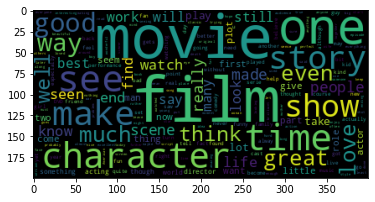

In [ ]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['sentiment']=="positive"]['review'])))
plt.imshow(wc)
plt.show()


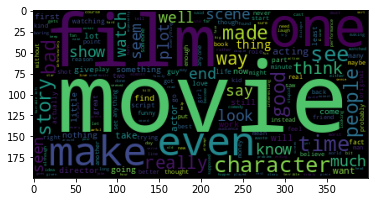

In [ ]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['sentiment']=="negative"]['review'])))
plt.imshow(wc)
plt.show()


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def clean_sent(text):
  #tokenization and case conversion
  token=word_tokenize(text.lower())
  #token--->list of tokens
  #removing non alpha char
  ftoken=[i for i in token if i.isalpha()]
  #ftoken-----> list
  sw=stopwords.words("english")
  stokens=[i for i in ftoken if i not in sw]
  #stokens--->list
  #lemmatization
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stokens]
  #ltoken--->list
  #joining all tokens
  return " ".join(ltoken)

In [ ]:
df['review']=df['review'].astype('str')

In [ ]:
df["review"]=df["review"].apply(clean_sent)


In [ ]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [ ]:
X=df['review']

In [ ]:
y=df['sentiment']

In [ ]:
from sklearn.feature_extraction.text import Tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(X).toarray()


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=1)


In [ ]:
#build logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
def mymodel(model_obj):
  model_obj.fit(xtrain,ytrain)
  ypred=model_obj.predict(xtest)
  print(classification_report(ytest,ypred))
  return model_obj


In [ ]:
lr=LogisticRegression()


In [ ]:
mymodel(lr)

In [ ]:
def result_msg(msg):
  clean_msg=clean_sent(msg)
  x_msg=cv.transform([clean_msg]).toarray()
  pred=lr.predict(x_msg)[0]
  print(pred)

In [ ]:
result_msg("The movie was worst movie with badly directed")